In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import fish_models
import robofish.io

In [3]:
fishes = 4

In [6]:
class KNNFishModel(fish_models.gym_interface.AbstractRaycastBasedModel):
    """
        kNN classifier determines the class of a data point by majority voting principle. 
        
        If k is set to n, the classes of n closest points are checked. 
        Prediction is done according to the majority class. 
        Similarly, kNN regression takes the mean value of n closest points.
    """
    
    def choose_action(self, view: np.ndarray):
    
    action = self.predict_action(view)
    return speed, turn

    
    def euclidean_distance(self, x_1, x_2):
        """
        Measures the distance between data points to determine how data points are close.
        Euclidean distance is used for distance measurement and it is calculated 
        using the square of the difference between x and y coordinates of the points.
        
        Parameters
        ---------
        x1, x2 : array_like
            Elements to find the distance between.
        
        Returns
        ---------
        distance : ndarray
            Distance scalar        
        """
        return np.sum((x_1-x_2)**2, axis = 1)
    
    def fit(self, X_train, y_train):
        # todo

    def fit_speed(self, X_train, y_train_speed):
        """
        Storing the training set's speed for separate class predictions.
        """
        self.X = X_train
        self.y_speed = y_train_speed
        
    def fit_turn(self, y_train_turn):
        """
        Storing the training set's turn for separate class predictions.
        
        NOTE: the X data is neglected because is the same for the speed 
        """
        self.y_turn = y_train_turn
    
    def predict(self, X_test, k):
        
        """
        Predict the class of a data point by majority voting principle. 
        
        Parameters
        ---------
        X_test : array_like
            Test or created by TrackGeneratorGymRaycast datapoint
            
        k : int
            The number of k nearest neighbors to be used to determine a class of test datapoint
        
        Returns
        ---------
        predictions : list
            predicted speed/turn as the mean value of k closest points       
        """
        
        # getting the distance between each training point and the new point
        distances = self.euclidean_distance(self.X, X_test)
        # getting indexes of k first minimal elements
        idx = np.argpartition(distances, k)[:k]
        # taking labels by indexes
        votes = (self.y[idx]).astype(int)
        # the class with maximum votes => the class with minimal distance to k nearest neighbors
        predictions = np.argmax(np.bincount(votes, minlength=10))
        return prediction
        
    
model = KNNFishModel()

In [4]:
raycast = fish_models.gym_interface.Raycast(
            n_wall_raycasts=5,
            n_fish_bins=4,
            fov_angle_fish_bins=np.pi,
            fov_angle_wall_raycasts=np.pi,
            world_bounds=([-50, -50], [50, 50]),
        )



In [5]:
data_folder = Path("data/live_female_female/train")

dset = fish_models.datasets.io_dataset.IoDataset(
    data_folder,
    raycast,
    output_strings=["poses", "actions", "views"],
    reduce_dim=2,
    max_files=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Loading data from 5 files.


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating views from 5 files.


100%|██████████| 5/5 [00:09<00:00,  1.93s/it]

Created IoDataset:
Reduced the first 3 dimensions from (5, 2, 8989) to (89890)
poses	(89890, 3):	consisting of x, y, calc_ori_rad.
actions	(89880, 2):	consisting of speed[cm/s] and turn [rad/s].
views	(89880, 9):	4 fish_bins and 5 wall ray casts.



In [6]:
model.train(dset)

In [7]:
generator = fish_models.gym_interface.TrackGeneratorGymRaycast(
    model, raycast, [100,100], 25
)

track = generator.create_track(n_guppies=fishes, trackset_len=5000)

100%|██████████| 4999/4999 [01:09<00:00, 72.23it/s]


In [8]:

f = generator.as_io_file(track)
f.save_as("output/mean_shift.hdf5")

<HDF5 file "8a376c6a-e1b4-4c5b-ad7c-e298a271d31a" (mode r+)>

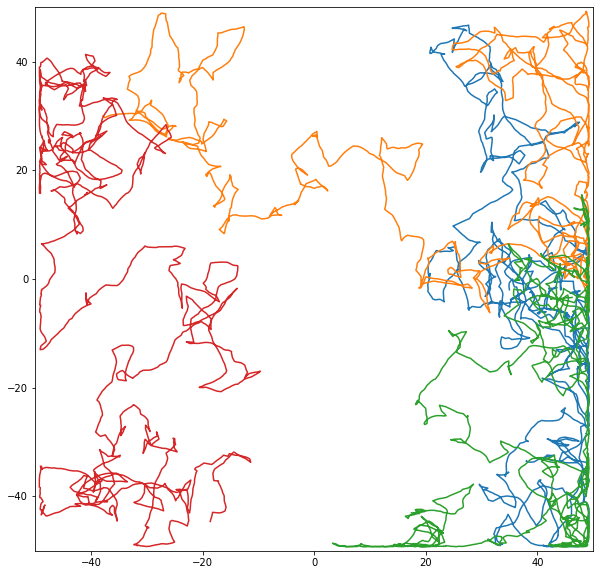

In [9]:
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(fishes):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()